In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
#import lux
from sklearn.preprocessing import MinMaxScaler


jupyter nbextension install --py luxwidget
jupyter nbextension enable --py luxwidget
pip install lux-api


In [6]:
#!pip install lux

In [7]:
#lux.logger = True

In [8]:
#importing dataset
df = pd.read_csv('kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [9]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
df.isnull().sum()/len(df) *100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
# sklearn approach to handle missing data

from sklearn.impute import SimpleImputer

In [13]:
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [15]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [16]:
#Finding the unique values in columns

for i in df_imputed.columns:
    print("********",i,"*********")
    print()
    print(set(df_imputed[i].tolist()))
    print()

******** id *********

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

pcv - nwq,
wc-nwq,
rc-nwq (num with quote),
dm-char,
cad-char,
classification-char,

In [17]:
print(df_imputed['pcv'].mode())
print(df_imputed['wc'].mode())
print(df_imputed['rc'].mode())

0    41
Name: pcv, dtype: object
0    9800
Name: wc, dtype: object
0    5.2
Name: rc, dtype: object


In [18]:
df_imputed['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [19]:
df_imputed['classification']=df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [20]:
df_imputed['cad'].value_counts()

no      364
yes      34
\tno      2
Name: cad, dtype: int64

In [21]:
df_imputed['cad']=df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [22]:
df_imputed['dm'].value_counts()

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [23]:
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [24]:
df_imputed['rc'].value_counts()

5.2    148
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.3      4
6.0      4
4.0      3
3.3      3
4        3
3.5      3
2.9      2
3.1      2
2.6      2
2.1      2
2.5      2
2.8      2
3.0      2
2.7      2
5        2
2.3      1
\t?      1
2.4      1
3        1
8.0      1
Name: rc, dtype: int64

In [25]:
df_imputed['rc']=df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [26]:
df_imputed['wc'].value_counts()

9800     116
6700      10
9600       9
7200       9
9200       9
        ... 
19100      1
\t?        1
12300      1
14900      1
12700      1
Name: wc, Length: 92, dtype: int64

In [27]:
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'8400' if x=='\t8400' else x)

In [28]:
df_imputed['pcv'].value_counts()

41      91
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
22       3
27       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
\t?      1
16       1
14       1
Name: pcv, dtype: int64

In [29]:
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'43' if x=='\t43' else x)


In [30]:
for i in df_imputed.columns:
    print("********",i,"*********")
    print()
    print(set(df_imputed[i].tolist()))
    print()

******** id *********

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

AxesSubplot(0.125,0.11;0.775x0.77)


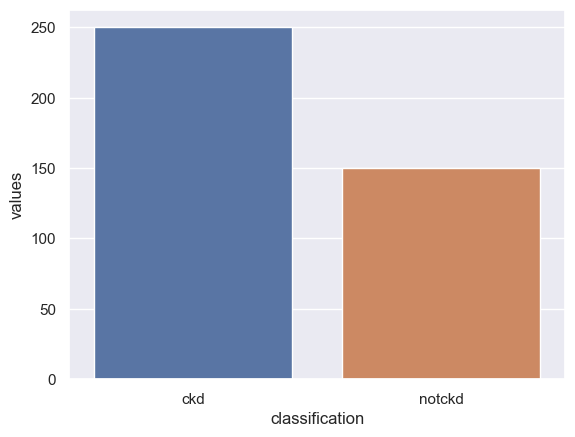

In [31]:
temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification':temp.index,'values':temp.values})
print(sns.barplot(x='classification',y='values',data=temp_df))

In [32]:
df_imputed['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [33]:
df.select_dtypes(exclude=['object']).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [34]:
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i] = df_imputed[i].apply(lambda x:float(x))

In [35]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

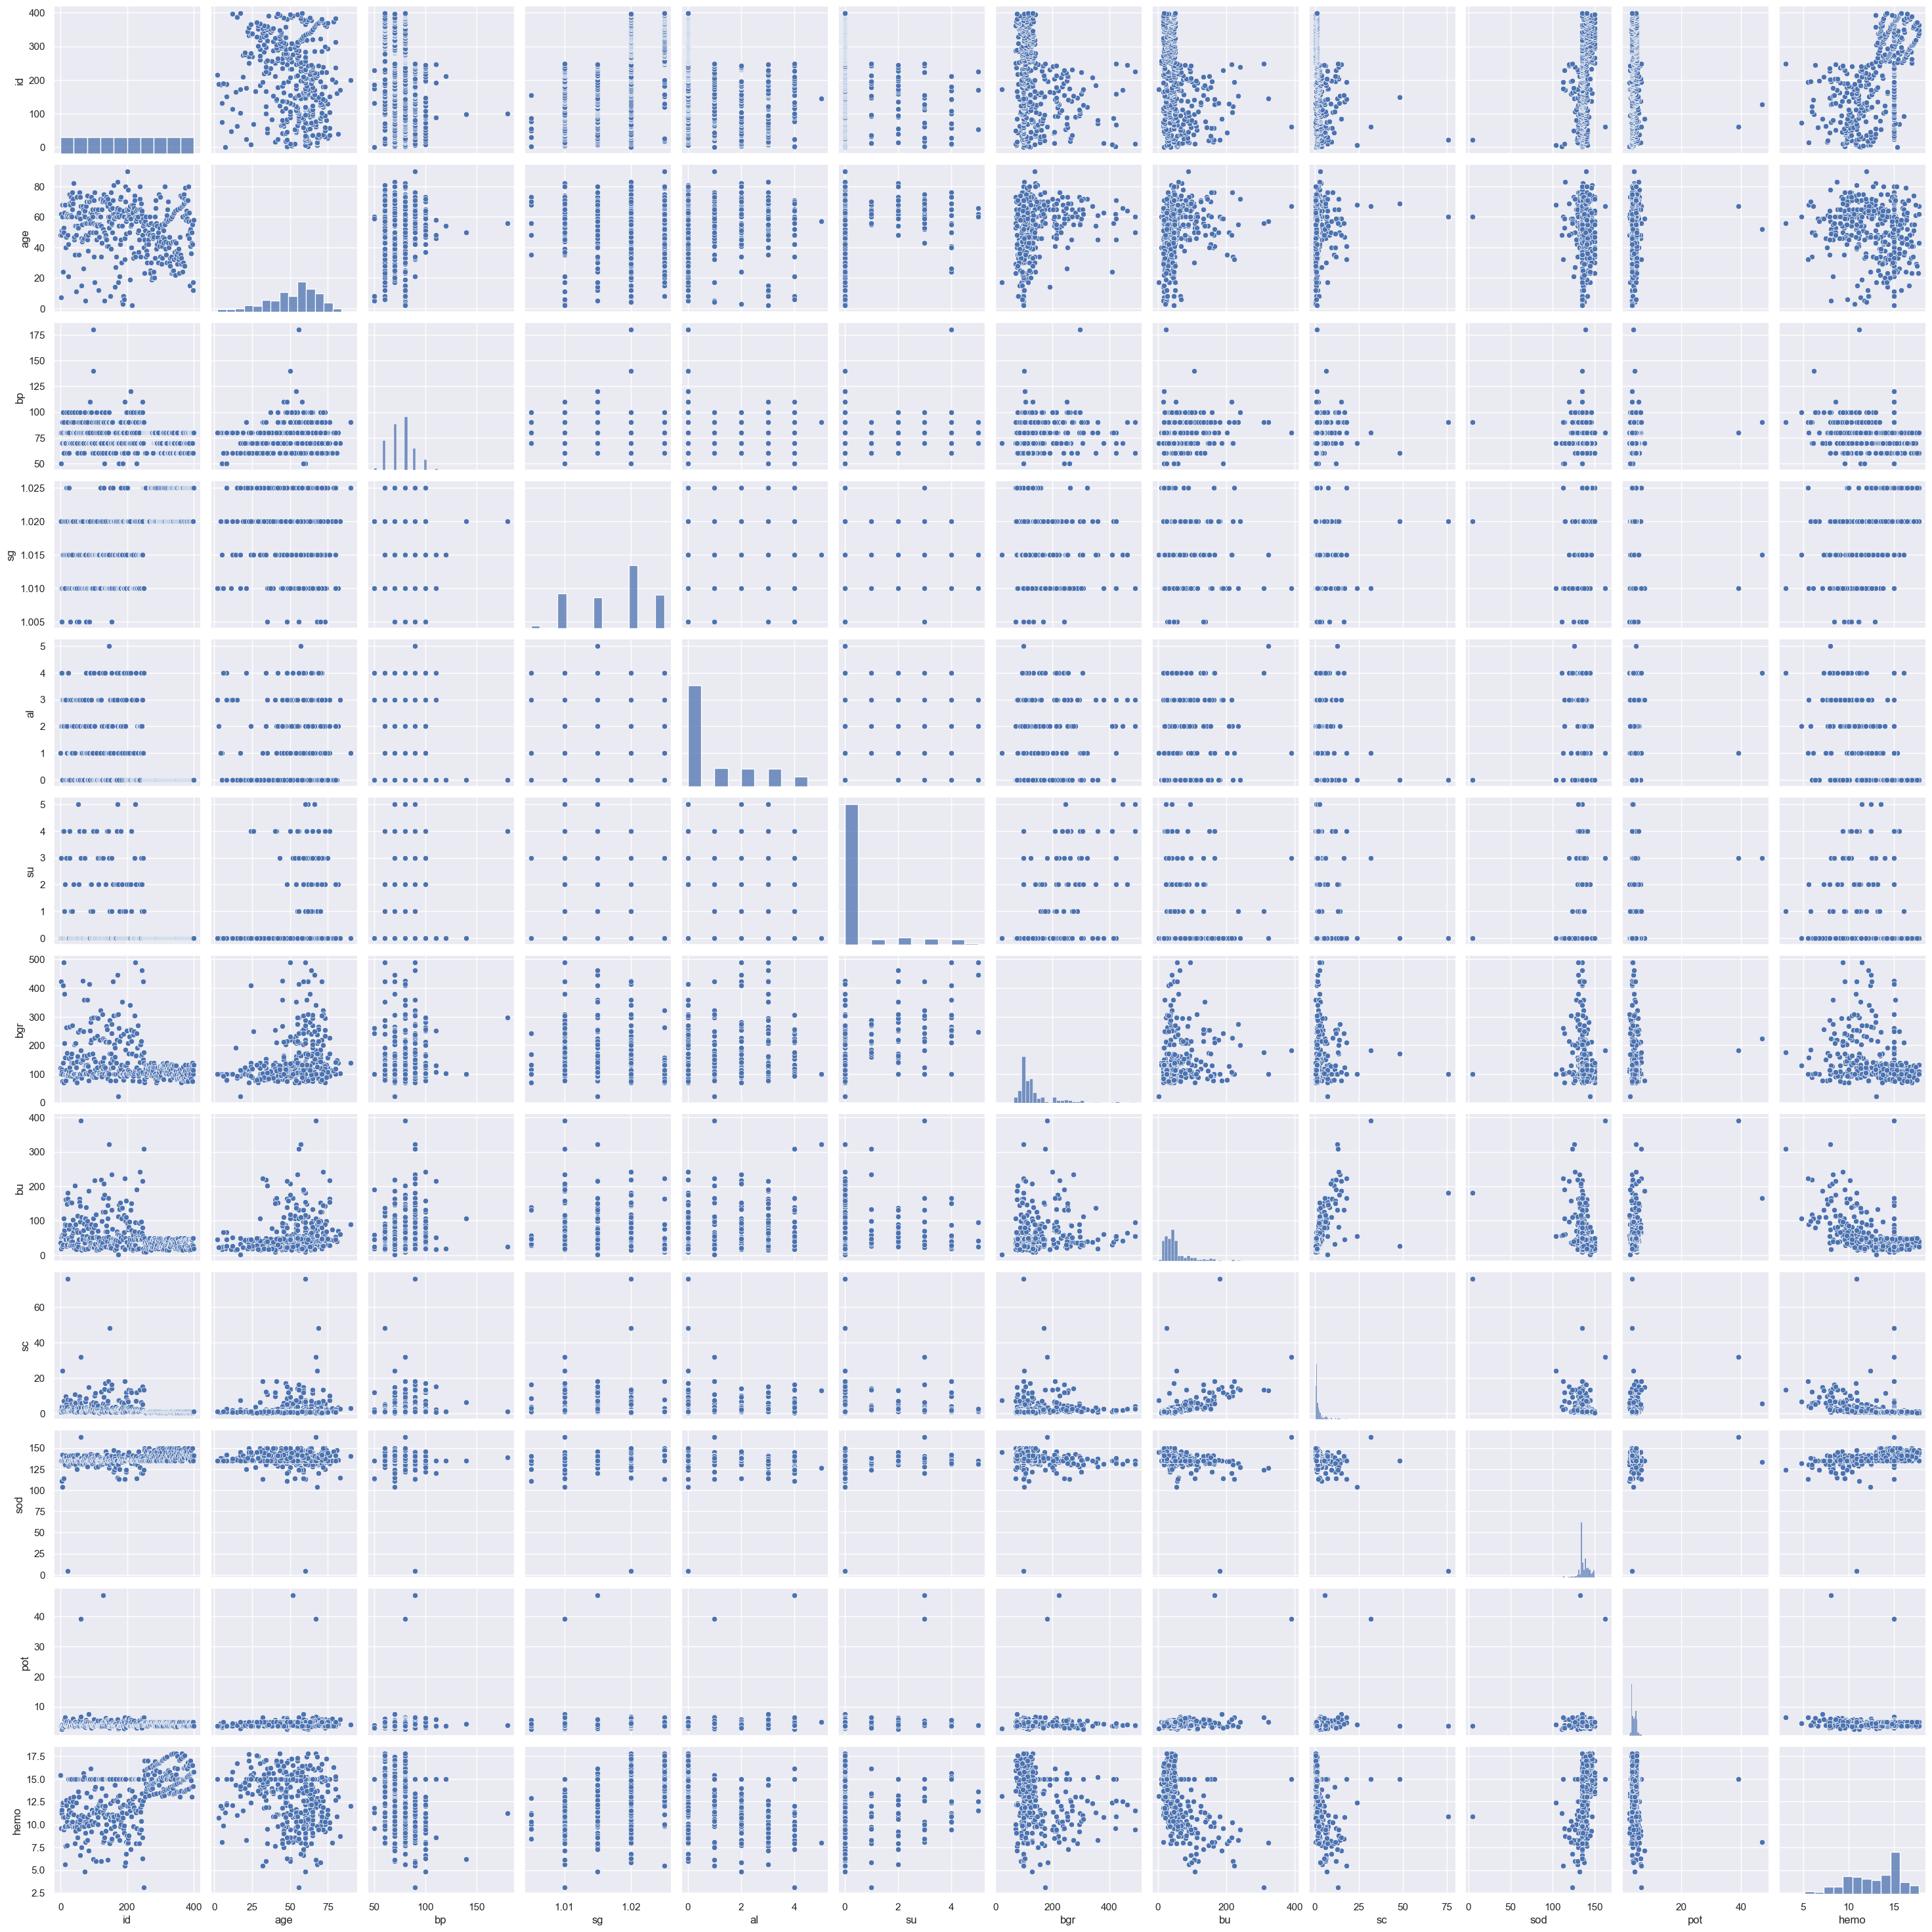

In [36]:
sns.pairplot(df_imputed)

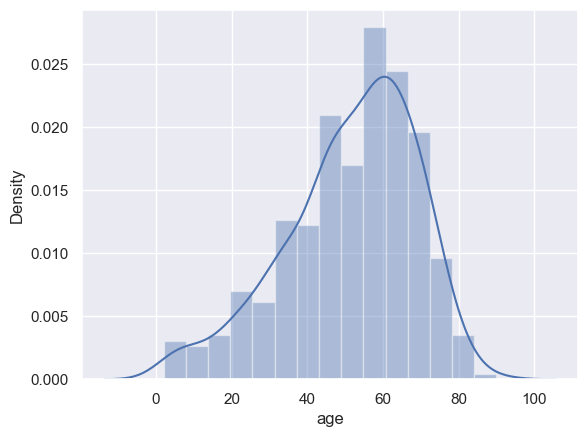

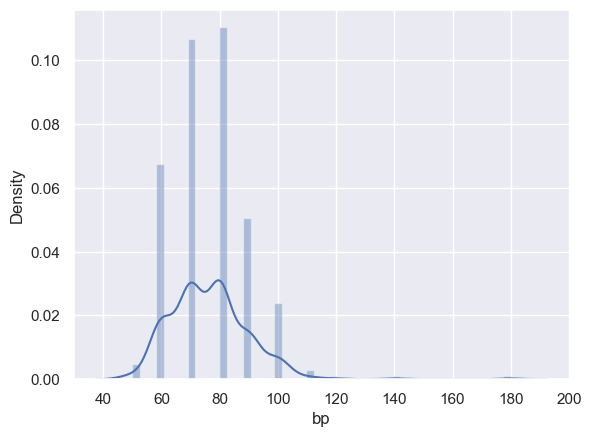

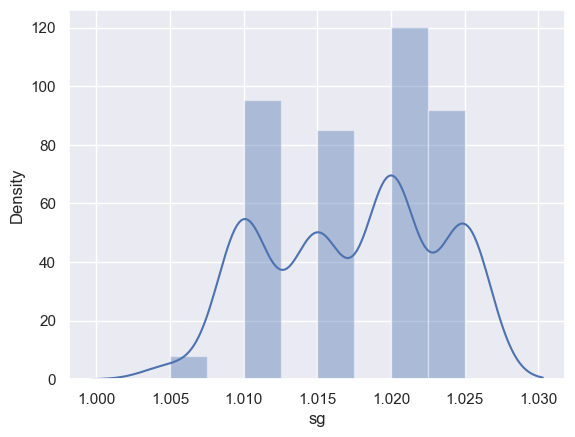

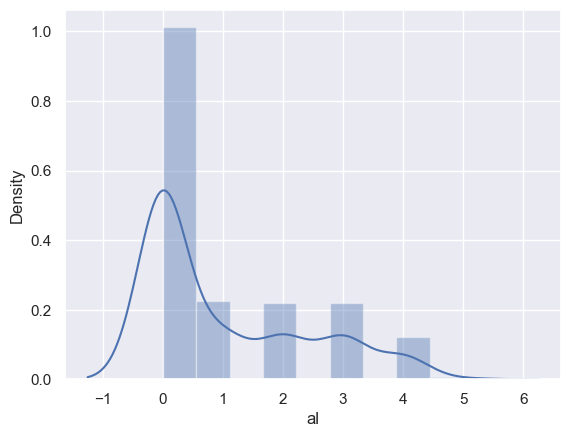

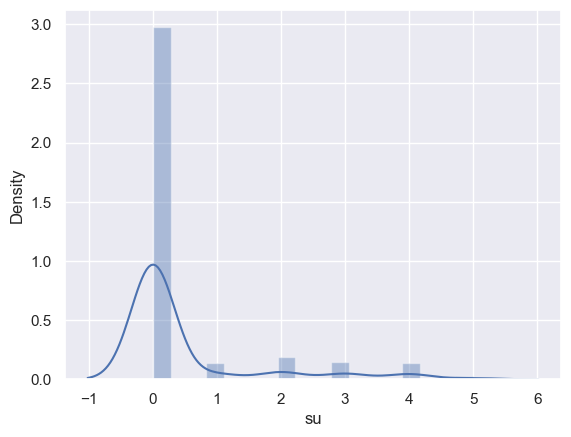

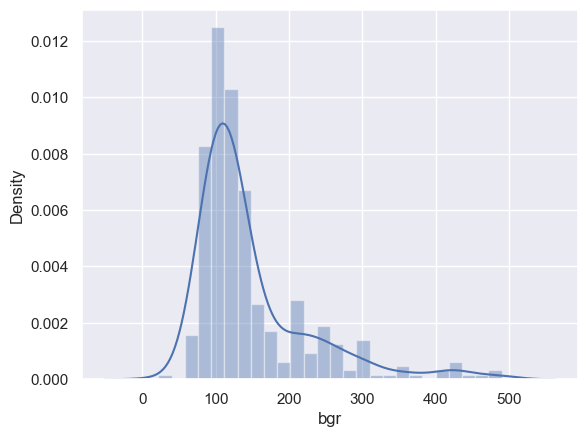

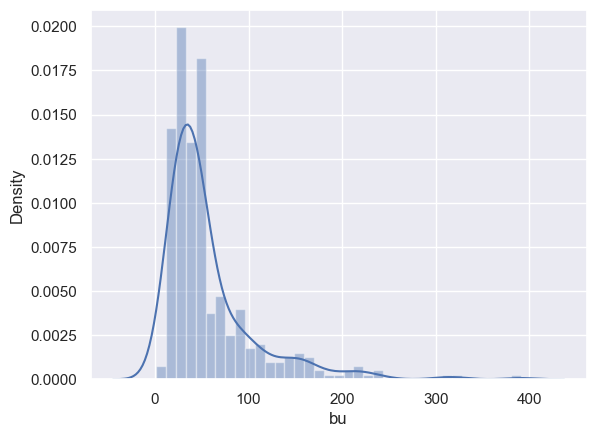

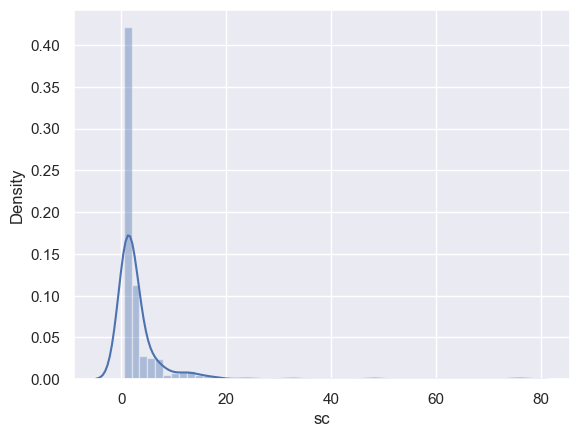

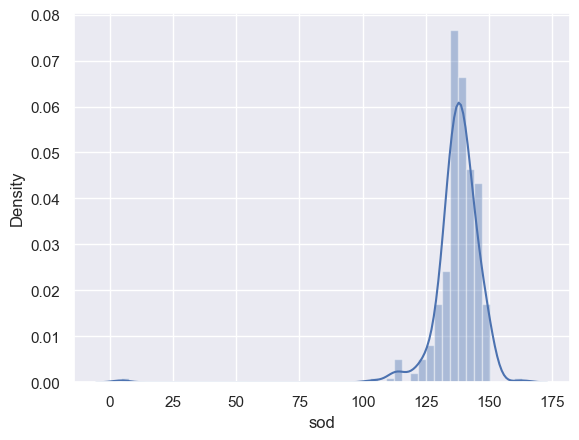

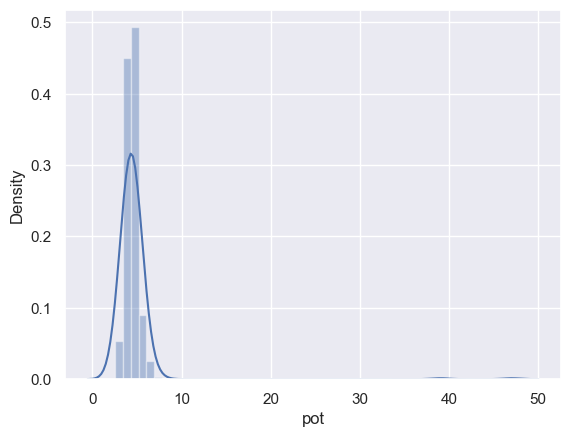

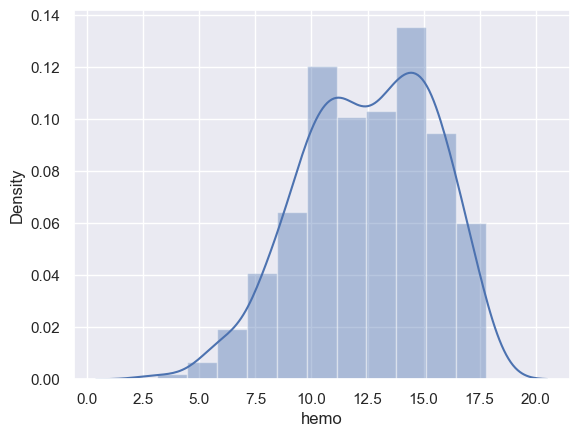

In [37]:
# Find the distribution of the data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)

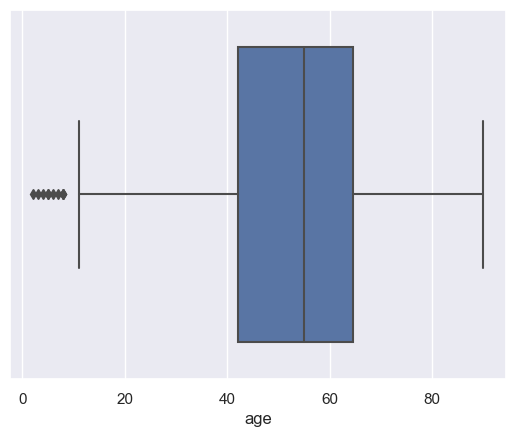

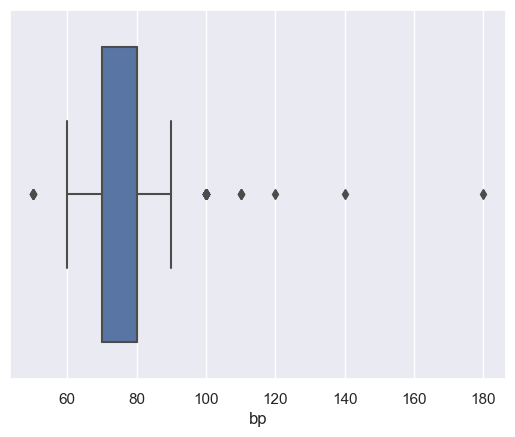

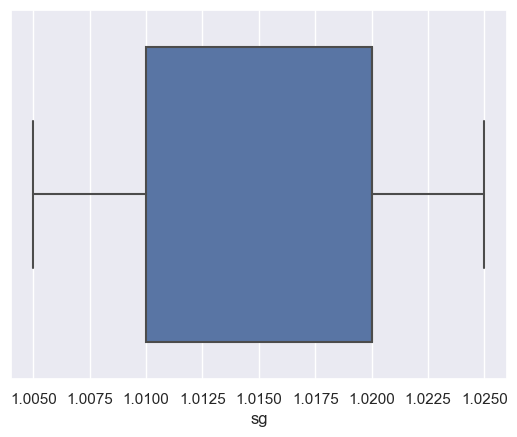

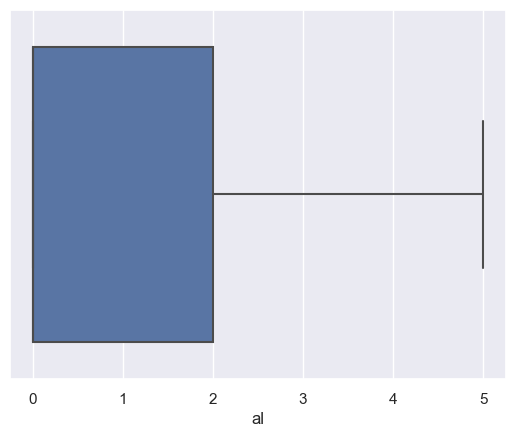

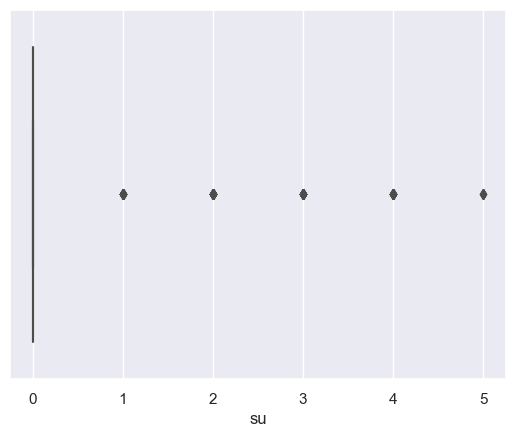

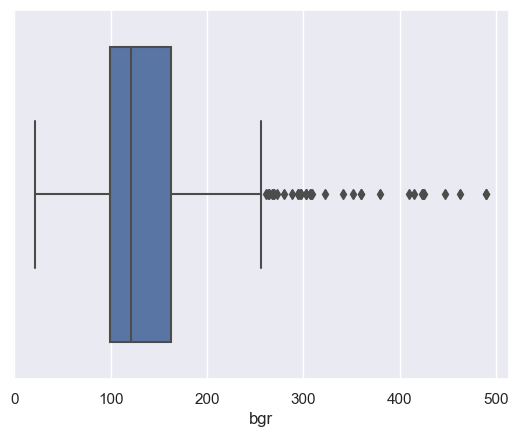

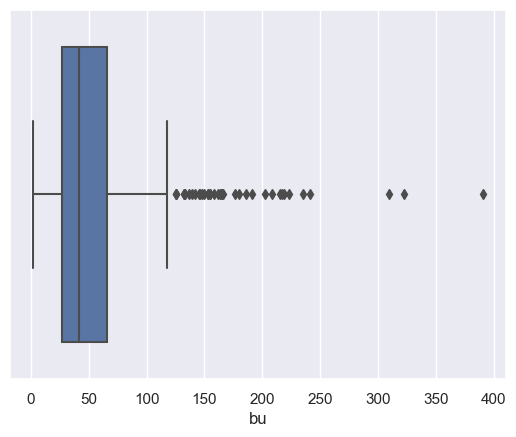

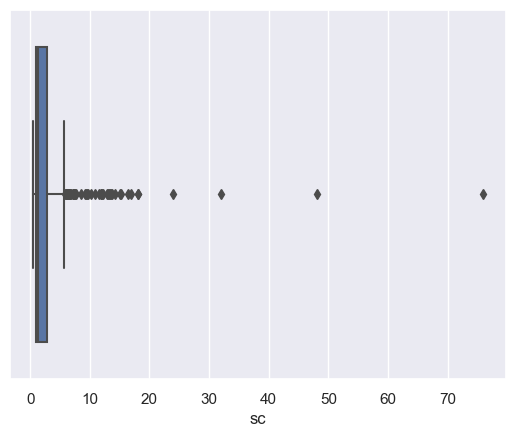

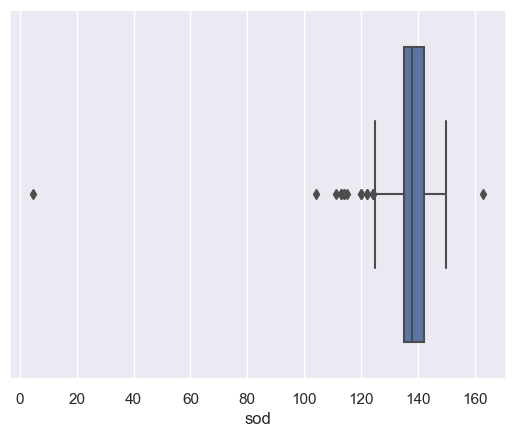

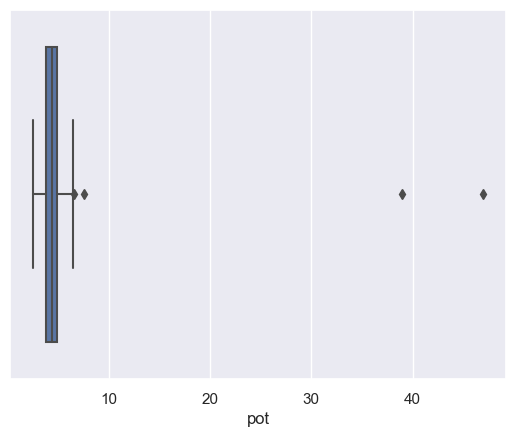

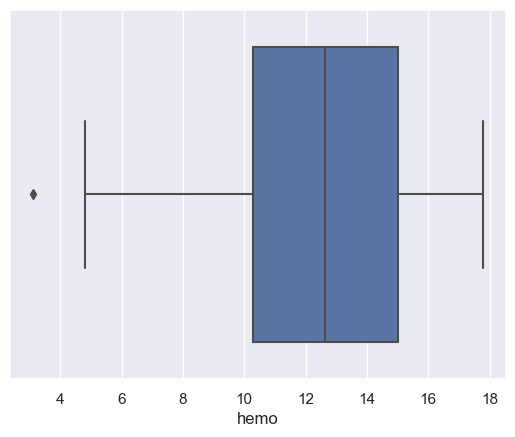

In [38]:
# Finding and removing outliers if necessary (not required as medical domain)

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)


In [39]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [40]:
# Label Encoding to convert categorical values to numerical

from sklearn import preprocessing
#df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_imputed 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [41]:
#categorical_feature = [feature for feature in df_imputed.columns if df_imputed[feature].dtype == 'O']


In [42]:
df_imputed['pcv']=df_imputed['pcv'].astype('float')
df_imputed['wc']=df_imputed['wc'].astype('float')
df_imputed['rc']=df_imputed['rc'].astype('float')


In [43]:
#categorical_feature = [feature for feature in df_imputed.columns if df_imputed[feature].dtype == 'O']


In [44]:
for i in df_imputed.select_dtypes(exclude=['float']).columns:
    df_imputed[i] = df_imputed[i].astype('category')
    df_imputed[i] = df_imputed[i].cat.codes

df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3.0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4.0,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [45]:
df_imputed.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,39.260000,8775.500000,4.868750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,17.022008,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.191162,2597.309144,0.871606,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,41.000000,9450.000000,5.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9800.000000,5.200000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

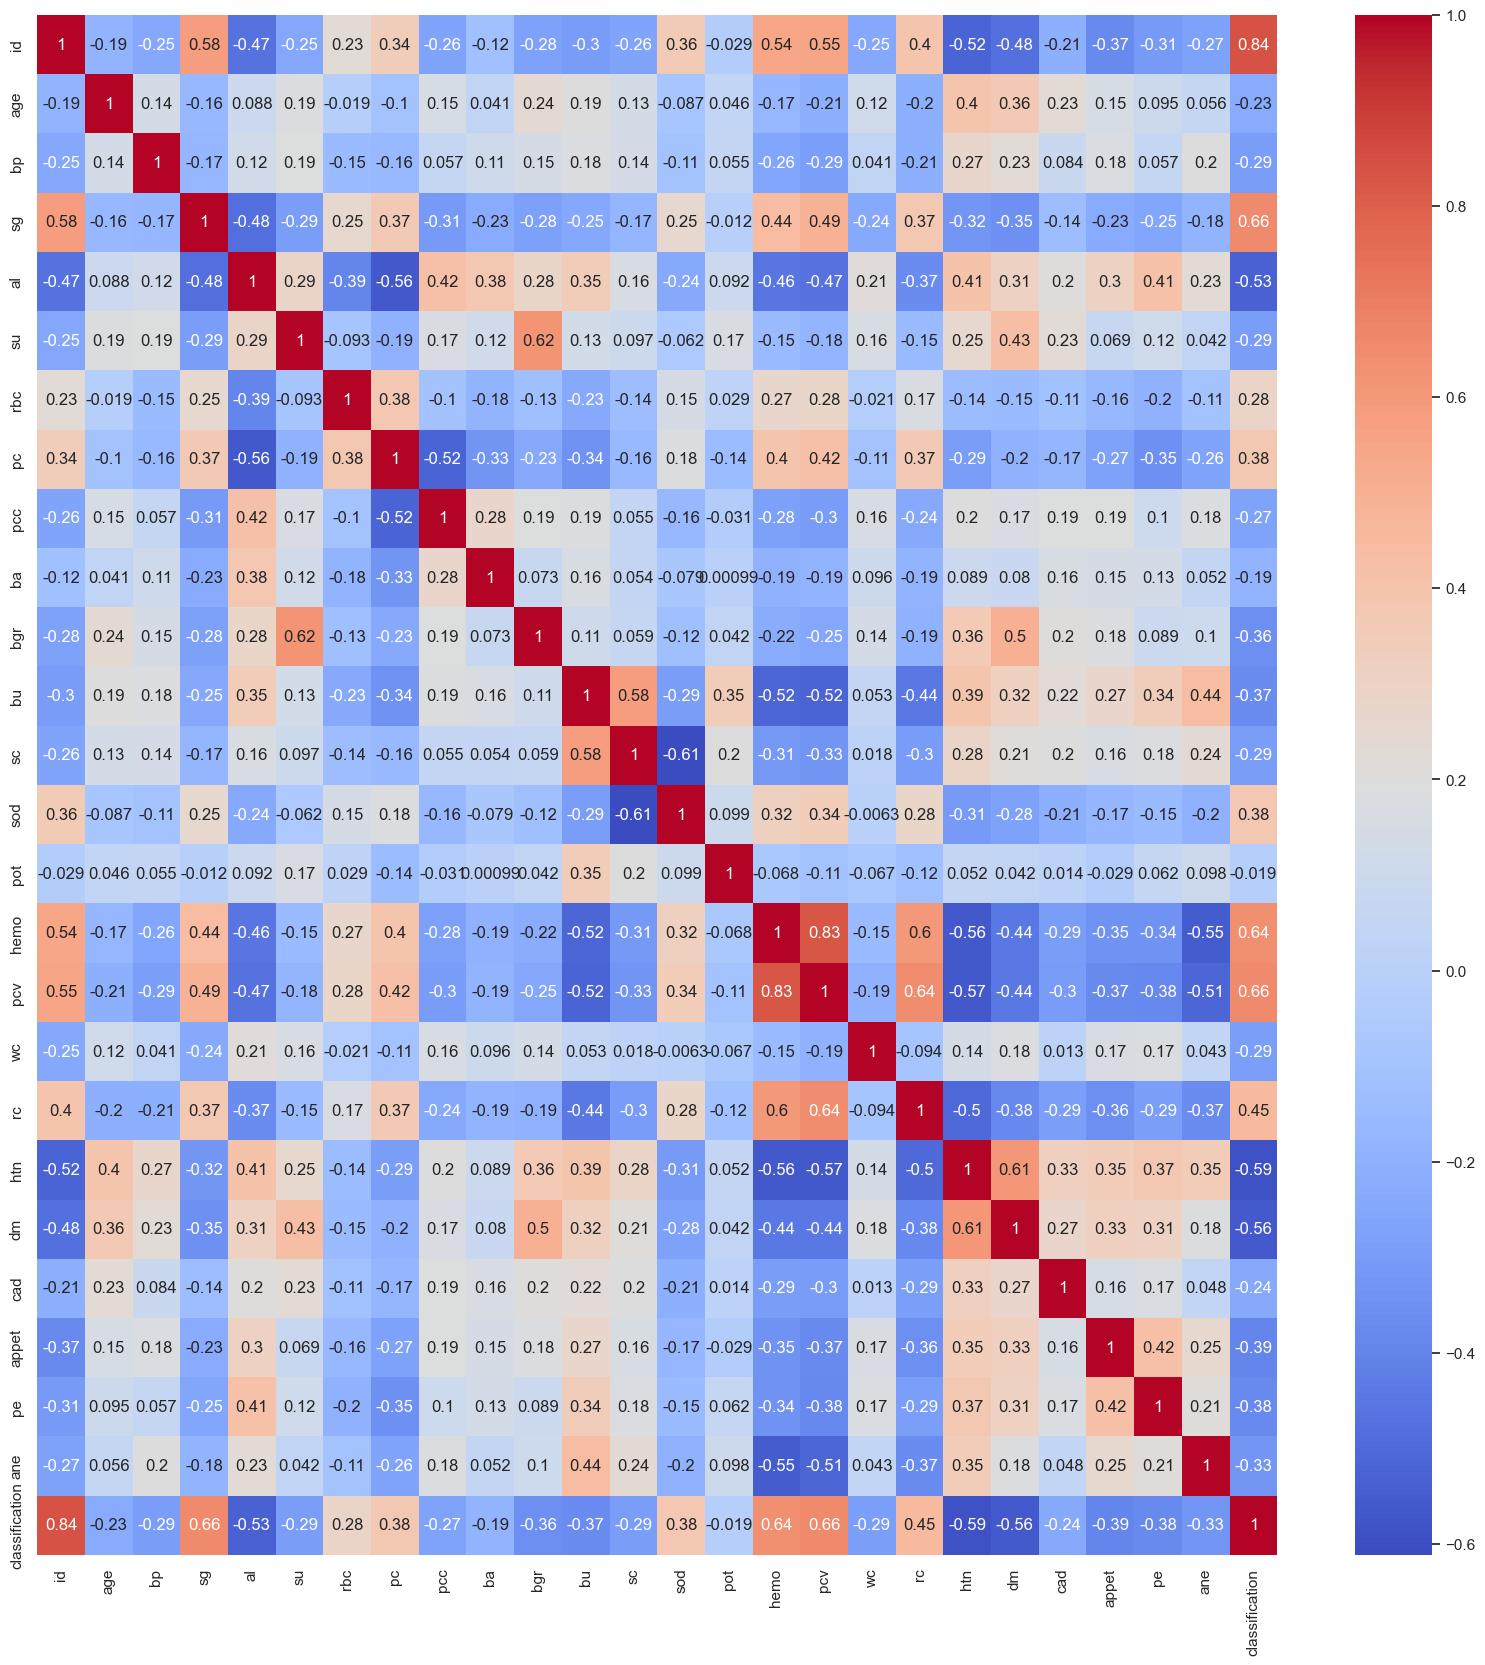

In [46]:
plt.figure(figsize=(20,20))
corr=df_imputed.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#classification highly corr to id but id just describe the characteristics of patient logically

In [47]:
#splitting data into dependent and independent variable
x = df_imputed.drop(['id','classification'],axis =1)
y = df_imputed['classification']

In [48]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int8

In [50]:
df_imputed['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [51]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [52]:
import imblearn

In [53]:
#!pip install imblearn

In [54]:
from collections import Counter
print(Counter(y))

Counter({0: 250, 1: 150})


In [55]:
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [56]:
#feature scaling
# from sklearn.preprocessing import StandardScaler
#Min max Scaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [57]:
x

array([[ 0.04545455, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.88636364, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.36363636, -0.53846154, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [ 0.36363636, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.15909091, -0.69230769,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.29545455, -0.84615385,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int8

In [59]:
x.shape

(500, 24)

In [60]:
# Dimension reduction cz there are alot multicollinear(from heatmap)
# PCA will reduce non significant variable and values

from sklearn.decomposition import PCA

pca =PCA(0.95)
x_pca=pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(500, 24)
(500, 15)


In [61]:
# Splitting data into train and test for building the model and prediction with test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=5)

## Neural Networks Models

## MLP - MultiLayer perceptron(Neural Network)

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Model
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'keras'

In [ ]:
# creating the model

def model():
    classifier=Sequential()
    classifier.add(Dense(15,input_shape=(x_train.shape[1],),activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15,activation='relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 36ms/step - loss: 0.6170 - accuracy: 0.7250 - val_loss: 0.5551 - val_accuracy: 0.9100
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5796 - accuracy: 0.7775 - val_loss: 0.4989 - val_accuracy: 0.9300
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5335 - accuracy: 0.8575 - val_loss: 0.4511 - val_accuracy: 0.9600
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.8825 - val_loss: 0.4074 - val_accuracy: 0.9600
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4407 - accuracy: 0.8750 - val_loss: 0.3674 - val_accuracy: 0.9700
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4041 - accuracy: 0.9000 - val_loss: 0.3297 - val_accuracy: 0.9700
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.3855 - accuracy: 0.9050 - val_loss: 0.2959 - val_accuracy: 0.9700
Epoch 8/50
13/13 [=